In [29]:
from typing import List, Dict
import scipy as sp
from scipy.stats import wilcoxon, mannwhitneyu


from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [30]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
    ]

In [31]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}
full_datasets: Dict[str, pd.DataFrame] = {}

In [32]:
for filesuffix in filesuffixes:
    print(filesuffix)
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials


_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999853  | 0.000124908 | 0.999579   | 1         |
| recall__class_0    | 0.945489  | 0.00256314  | 0.940989   | 0.949121  |
| f1-score__class_0  | 0.97191   | 0.00135033  | 0.969548   | 0.973844  |
| precision__class_1 | 0.010949  | 0.00227212  | 0.00680272 | 0.0134875 |
| recall__class_1    | 0.811905  | 0.161261    | 0.5        | 1         |
| f1-score__class_1  | 0.0216048 | 0.00447566  | 0.0134454  | 0.0265655 |
| accuracy           | 0.94539   | 0.00255215  | 0.940937   | 0.949057  |
| auc                | 0.925148  | 0.0774316   | 0.730414   | 0.99

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


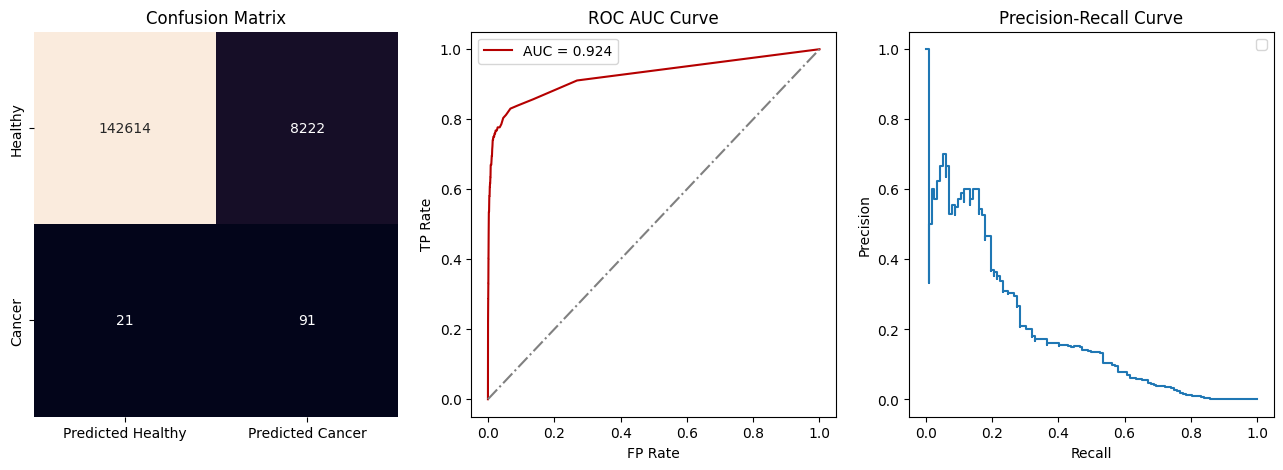

_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.006666666666666667


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999832   | 0.000172033 | 0.999371   | 1         |
| recall__class_0    | 0.942385   | 0.00318521  | 0.937387   | 0.949696  |
| f1-score__class_0  | 0.970256   | 0.00165147  | 0.967682   | 0.973901  |
| precision__class_1 | 0.00998127 | 0.00280468  | 0.00394477 | 0.0125    |
| recall__class_1    | 0.785714   | 0.217346    | 0.25       | 1         |
| f1-score__class_1  | 0.0197105  | 0.00553531  | 0.00776699 | 0.0246914 |
| accuracy           | 0.942269   | 0.00311094  | 0.937431   | 0.949139  |
| auc                | 0.890142   | 0.107142    | 0.585554   | 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


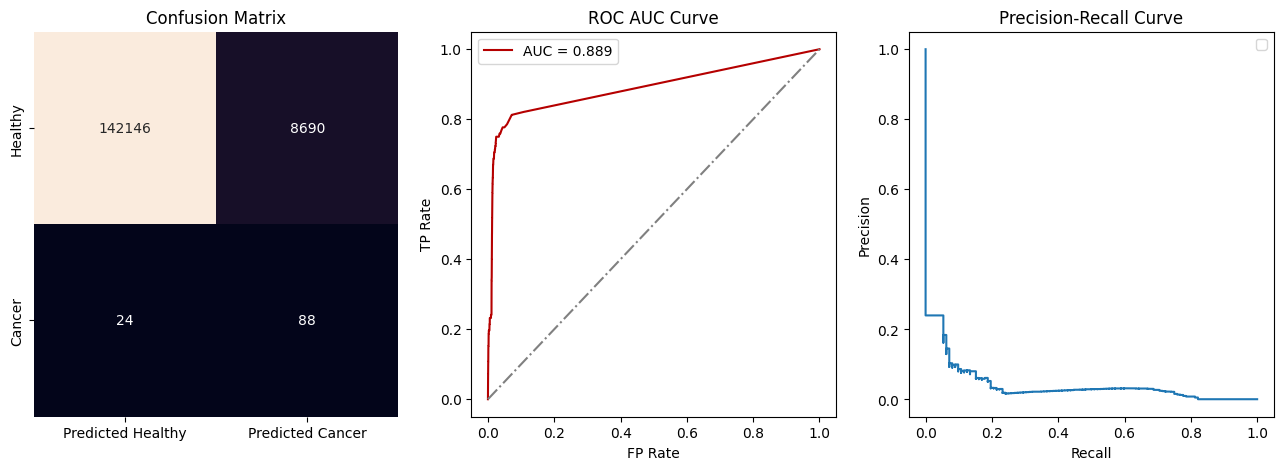

_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.01


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999838   | 0.000137264 | 0.999579   | 1         |
| recall__class_0    | 0.941193   | 0.00304653  | 0.936907   | 0.94621   |
| f1-score__class_0  | 0.969627   | 0.00158085  | 0.967376   | 0.972163  |
| precision__class_1 | 0.00989997 | 0.00218047  | 0.00547445 | 0.0124334 |
| recall__class_1    | 0.794048   | 0.178937    | 0.428571   | 1         |
| f1-score__class_1  | 0.0195542  | 0.00430314  | 0.0108108  | 0.0245184 |
| accuracy           | 0.941084   | 0.00297426  | 0.936858   | 0.945854  |
| auc                | 0.920372   | 0.0824749   | 0.7610

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


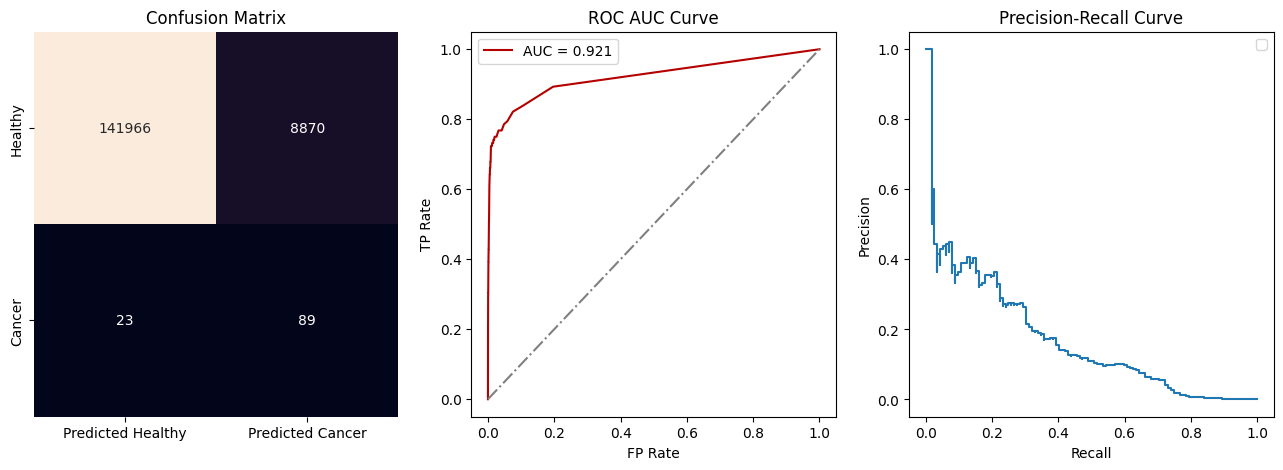

_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.005996827036142349


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999839  | 0.000111188 | 0.999679   | 1         |
| recall__class_0    | 0.944335  | 0.01122     | 0.926103   | 0.962663  |
| f1-score__class_0  | 0.971262  | 0.00592362  | 0.961534   | 0.980927  |
| precision__class_1 | 0.0107971 | 0.00294536  | 0.00656814 | 0.0183727 |
| recall__class_1    | 0.791667  | 0.150719    | 0.571429   | 1         |
| f1-score__class_1  | 0.0212904 | 0.00575087  | 0.012987   | 0.0359897 |
| accuracy           | 0.944224  | 0.0111857   | 0.925955   | 0.962594  |
| auc                | 0.9332    | 0.0580927   | 0.794282   | 0.995686  |
+

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


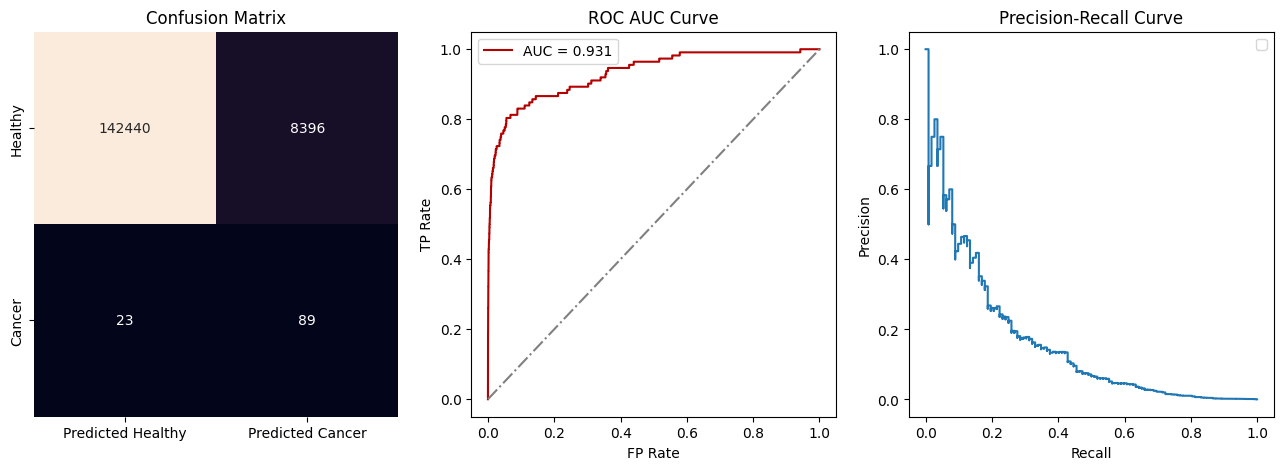

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.02666666666666667


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999656  | 0.000194222 | 0.999376   | 0.999898  |
| recall__class_0    | 0.965745  | 0.0026655   | 0.961072   | 0.971086  |
| f1-score__class_0  | 0.982406  | 0.00136881  | 0.980051   | 0.985232  |
| precision__class_1 | 0.0118253 | 0.00540759  | 0.00290698 | 0.0197183 |
| recall__class_1    | 0.55119   | 0.254055    | 0.142857   | 0.875     |
| f1-score__class_1  | 0.0231498 | 0.0105822   | 0.00569801 | 0.0385675 |
| accuracy           | 0.965438  | 0.00264222  | 0.960906   | 0.970908  |
| auc                | 0.806297  | 0.119771    | 0.585479   |

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


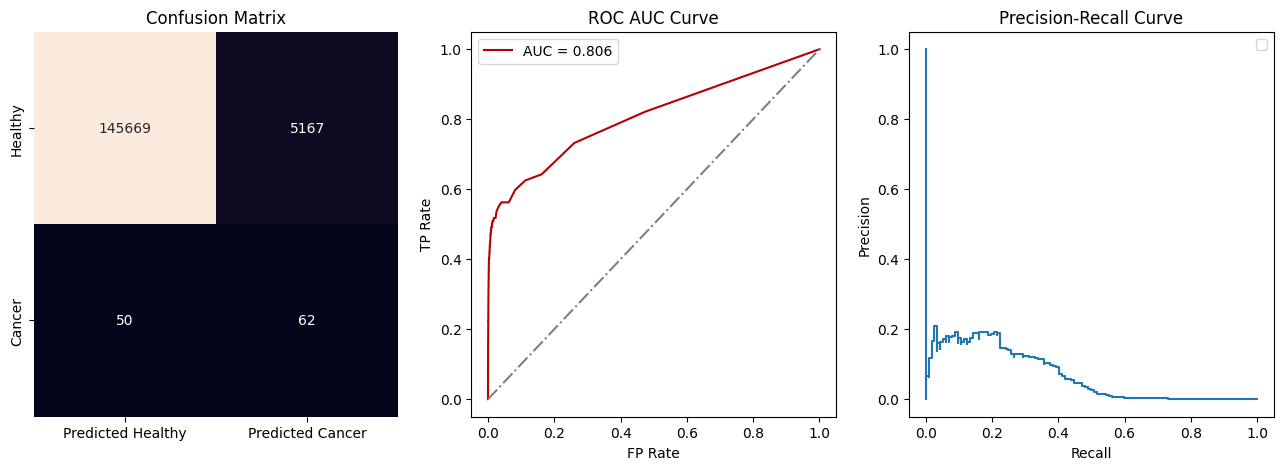

_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999851   | 0.000132732 | 0.999677   | 1         |
| recall__class_0    | 0.931792   | 0.0037421   | 0.924072   | 0.938604  |
| f1-score__class_0  | 0.964619   | 0.00201555  | 0.960389   | 0.96833   |
| precision__class_1 | 0.00879922 | 0.00220857  | 0.00583942 | 0.0128411 |
| recall__class_1    | 0.809524   | 0.173219    | 0.571429   | 1         |
| f1-score__class_1  | 0.0174077  | 0.00435831  | 0.0115607  | 0.0253566 |
| accuracy           | 0.931704   | 0.00375869  | 0.923834   | 0.938653  |
| auc                | 0.92752    | 0.0636234   | 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


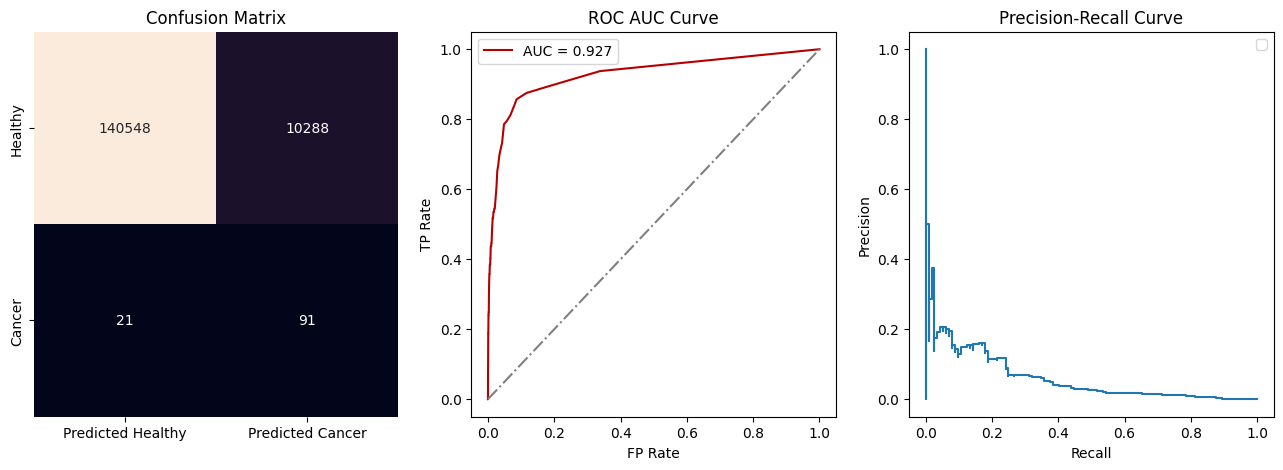

In [33]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'
    
    if 'single' in filesuffix:
        cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = label))
    # Plot
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    # End Plot
    full_datasets[filesuffix] = cv_analytics_util.get_dataset_with_predictions()
    # full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    # full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

In [34]:
def calc_U(y_true, y_score):
    n1 = np.sum(y_true==1)
    n0 = len(y_score)-n1
    
    ## Calculate the rank for each observation
    # Get the order: The index of the score at each rank from 0 to n
    order = np.argsort(y_score)
    # Get the rank: The rank of each score at the indices from 0 to n
    rank = np.argsort(order)
    # Python starts at 0, but statistical ranks at 1, so add 1 to every rank
    rank += 1
    
    # If the rank for target observations is higher than expected for a random model,
    # then a possible reason could be that our model ranks target observations higher
    U1 = np.sum(rank[y_true == 1]) - n1*(n1+1)/2
    U0 = np.sum(rank[y_true == 0]) - n0*(n0+1)/2
    
    # Formula for the relation between AUC and the U statistic
    AUC1 = U1/ (n1*n0)
    AUC0 = U0/ (n1*n0)
    
    return U1, AUC1, U0, AUC0

In [35]:
full_dataset1 = full_datasets['_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
full_dataset2 = full_datasets['_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()

In [51]:
full_dataset1 = full_datasets['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
full_dataset2 = full_datasets['_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials'].copy()

In [36]:
# full_dataset1 = full_dataset1[full_dataset1[f'{label}_prob'] > 0.01]
# full_dataset2 = full_dataset2[full_dataset2[f'{label}_prob'] > 0.01]

In [52]:
distr1 = full_dataset1[f'{label}_prob'].to_numpy()
distr2 = full_dataset2[f'{label}_prob'].to_numpy()
y_true1 = full_dataset1[label].to_numpy()
y_true2 = full_dataset2[label].to_numpy()
scipy_U = mannwhitneyu(distr1, distr2, alternative='two-sided', use_continuity=False)
print(scipy_U.statistic)
print(scipy_U.pvalue)

5755783679.0
0.0


In [49]:
distr1.shape

(150948,)

In [39]:
distr2.shape

(150948,)

In [40]:
y_true1.shape

(150948,)

In [41]:
def calculate_se(predicted_probabilities, true_values):
    squared_errors = [(predicted_probability - true_value)**2 for predicted_probability, true_value in zip(predicted_probabilities, true_values)]
    return squared_errors


In [53]:
scipy_U = mannwhitneyu(calculate_se(distr1, y_true1), calculate_se(distr2, y_true2), alternative='two-sided', use_continuity=False)
print(scipy_U.statistic)
print(scipy_U.pvalue)

5756823122.0
0.0


In [54]:
y_true1 = y_true1.astype(int)
stat, p = mannwhitneyu(distr1[y_true1==1], distr1[y_true1==0], alternative='two-sided', use_continuity=False)
print(p)

1.4882740964251912e-88


In [55]:
stat, p = wilcoxon(calculate_se(distr1, y_true1), calculate_se(distr2, y_true2), zero_method='zsplit')
print(p)

0.0


In [56]:
import numpy as np
from mlxtend.evaluate import mcnemar_table, mcnemar

pred1 = full_dataset1[f'{label}_pred'].to_numpy().astype(int)
pred2 = full_dataset2[f'{label}_pred'].to_numpy().astype(int)

# Calculate p value
tb = mcnemar_table(y_target=y_true1, 
                   y_model1=pred1, 
                   y_model2=pred2)
chi2, p = mcnemar(ary=tb, exact=False)

print('chi-squared:', chi2)
print('p-value:', p)
print(f'table: {tb}')

chi-squared: 3.842534504391468
p-value: 0.04996793456064892
table: [[138632   4073]
 [  3897   4346]]


In [46]:
import numpy as np
from scipy.stats import chi2_contingency

# Assuming you have two arrays with predicted probabilities and true values for classifiers A and B
# For example, let's call these arrays prob_A, prob_B, true_values_A, true_values_B

# Create a "supermodel" by combining the predicted probabilities
supermodel_prob = np.vstack((distr1, distr2)).T

# Calculate the contingency table
contingency_table = np.histogram2d(y_true1, y_true2, bins=[2, 2])[0]

# Perform the likelihood-ratio chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table, correction=False)

print(f'chi-squared value: {chi2}')
print(f'p-value: {p_value}')
# Determine if one classifier is better than the other
if p_value < 0.05:
    if chi2 > 0:
        print("Method A is better than Method B")
    else:
        print("Method B is better than Method A")
else:
    print("There is no significant difference between Method A and Method B")


chi-squared value: 150948.0
p-value: 0.0
Method A is better than Method B
